In [4]:
import cv2
import IPython
import numpy as np
import pandas as pd

In [27]:
def distance_from_center(row):
    x = int((row['x2'] - row['x1'])/2) + row['x1']
    y = int((row['y2'] - row['y1'])/2) + row['y1']
    
    xx = int(row['img_width']/2)
    yy = int(row['img_height']/2)
    a = abs(yy - y) 
    b = abs(xx - x)
    c = np.sqrt(a^2 + b^2)
    return round(c, 2) 

In [5]:
def show_image(image):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [31]:
def draw_to_center(row):
    cap = cv2.VideoCapture(row['filepath'])
    cap.set(cv2.CAP_PROP_POS_FRAMES, row['frame_num'])
    ret, frame = cap.read()
    x = int((row['x2'] - row['x1'])/2) + row['x1']
    y = int((row['y2'] - row['y1'])/2) + row['y1']
    
    xx = int(row['img_width']/2)
    yy = int(row['img_height']/2)

    cv2.circle(frame, (x,y), 5, (0, 0, 255), -1)
    cv2.circle(frame, (xx,yy), 5, (0, 0, 255), -1)
    cv2.line(frame, (x,y), (xx,yy), (0, 0, 255), 2)
    show_image(frame)

In [32]:
df = pd.read_csv('/home/amos/datasets/shining_bat.csv', index_col=0)
df.head()

,x1,y1,x2,y2,right_eye_x,right_eye_y,left_eye_x,left_eye_y,nose_x,nose_y,...,mouth_left_y,confidence,frame_num,face_num,img_width,img_height,filename,filepath,distance_from_center,pct_of_frame
0,479,94,695,397,535,208,634,196,589,237,...,311,0.999,24,0,1280,720,shining_bat.mp4,/home/amos/programs/CineFace/data/test_videos/...,26.63,0.0708
1,515,114,730,422,570,231,669,223,623,276,...,342,0.999,48,0,1280,720,shining_bat.mp4,/home/amos/programs/CineFace/data/test_videos/...,27.04,0.0715
2,509,108,721,410,562,226,662,216,616,264,...,329,0.999,72,0,1280,720,shining_bat.mp4,/home/amos/programs/CineFace/data/test_videos/...,26.74,0.0695
3,515,99,732,407,584,220,685,212,648,261,...,326,0.999,96,0,1280,720,shining_bat.mp4,/home/amos/programs/CineFace/data/test_videos/...,27.02,0.0722
4,492,117,709,416,550,233,651,220,610,268,...,333,1.000,120,0,1280,720,shining_bat.mp4,/home/amos/programs/CineFace/data/test_videos/...,26.66,0.0698


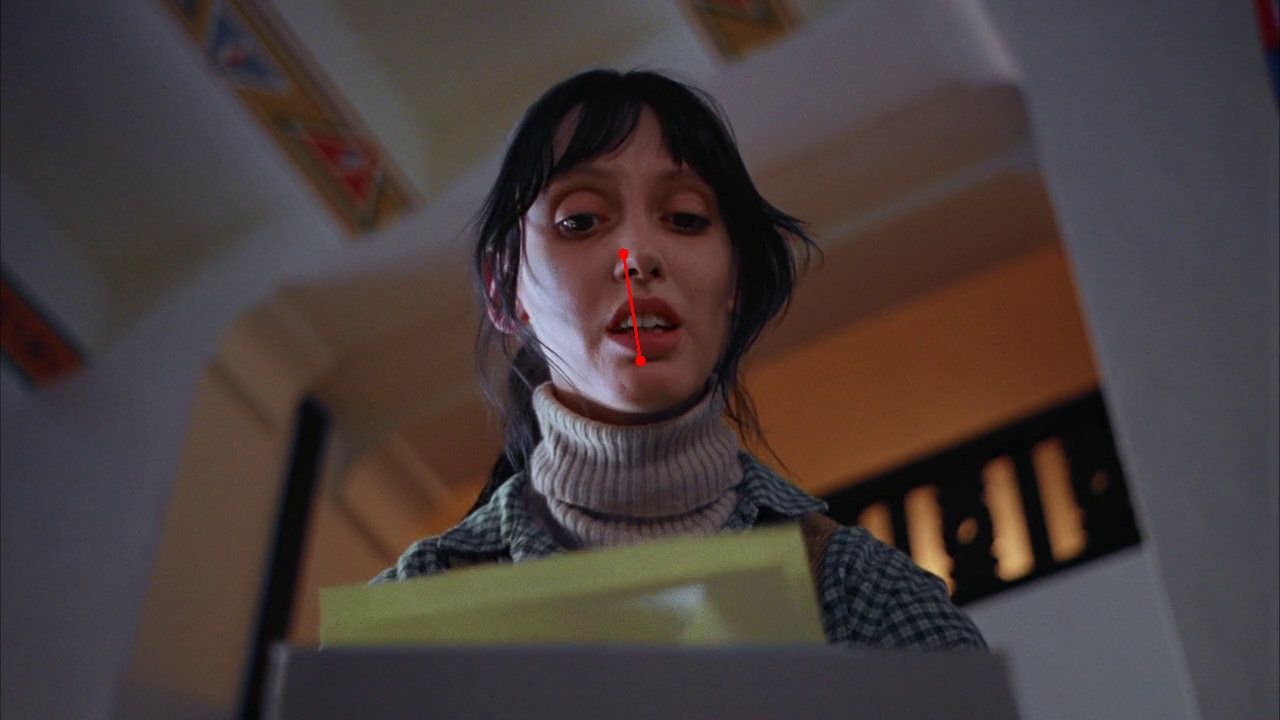

11.05


In [36]:
row = df.iloc[3]
draw_to_center(row)
print(distance_from_center(row))

In [44]:
x = int((row['x2'] - row['x1'])/2) + row['x1']
y = int((row['y2'] - row['y1'])/2) + row['y1']

xx = int(row['img_width']/2)
yy = int(row['img_height']/2)
a = abs(yy - y) 
b = abs(xx - x)
c = np.sqrt(a*a + b*b)

In [45]:
print(x,y)
print(xx,yy)

623 253
640 360


In [46]:
print(a, b, c)

107 17 108.34205093129813
